Dataset Features:
The Boston Housing dataset has 506 instances (rows) and 13 attributes (features), and the goal is to predict the median value of owner-occupied homes (target variable). Here are the features:

CRIM: Crime rate (per capita) by town

ZN: Proportion of residential land zoned for large plots

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: Nitrogen oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built before 1940

DIS: Weighted distance to employment centers

RAD: Index of accessibility to radial highways

TAX: Property tax rate (per $10,000)

PTRATIO: Pupil-teacher ratio by town

B: Proportion of residents of African American descent

LSTAT: Percentage of lower status population

Target Variable:
MEDV: Median value of owner-occupied homes in $1000s


# Importing required libraries

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Boston Housing Dataset

In [317]:
df = pd.read_csv("Boston.csv").rename(columns={'MEDV': 'Price'})
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


# Observing the dataset 

In [319]:
# Viewing 1st 10 rows
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [320]:
# Viewing last 10 rows 
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [321]:
# If we want to view the random rows of data. Here we are looking at 20% data.
sample_df = df.sample(frac = 0.2, random_state = 12)
sample_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224,20.2,6.75,20.7
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,16.35,12.7
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,27.38,8.5
236,0.52058,0.0,6.20,1,0.507,6.631,76.5,4.1480,8,307,17.4,9.54,25.1
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,7.53,28.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,10.97,24.4
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,16.23,14.9
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,11.25,31.0
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,16.22,14.3


In [322]:
# Column names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'Price'],
      dtype='object')

In [323]:
# Checking for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
Price      0
dtype: int64

In [324]:
# Shape of data
df.shape

(506, 13)

In [325]:
# Provides some info. regarding datatypes, columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  Price    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [326]:
# Gives full description of dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Insights:
1. The below chart suggests that the data is dominated by more affordable homes, with only a few very expensive properties pushing the price higher on the right side.
2. The majority of homes fall within a specific price range of 10 - 30, and there might be more homogeneous housing in that region (e.g., typical suburban homes).
3. There is a long tail to the right, it indicates the presence of outliers or extremely high-value homes.
4. Real estate investors or policymakers may use this information to make decisions about investment strategies, such as targeting affordable housing or high-end housing developments.

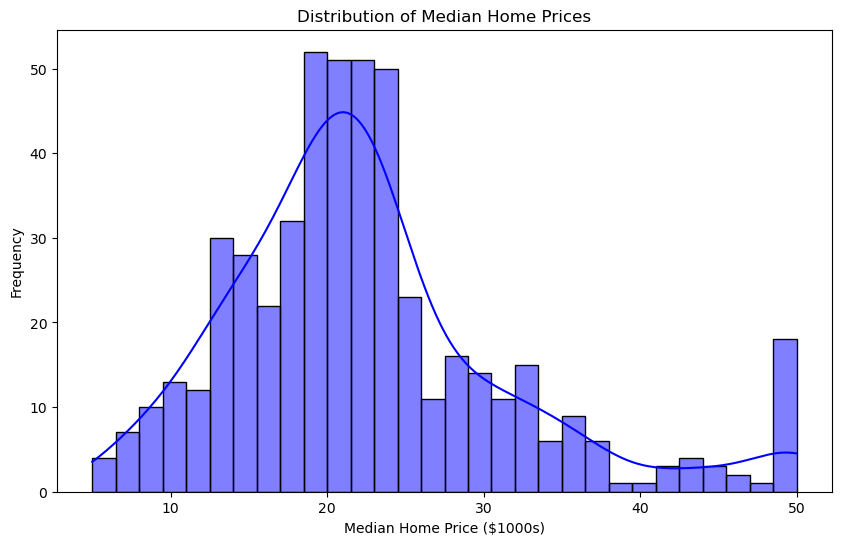

In [328]:
# Visualize the distribution of the target variable ('Price')
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Median Home Prices')
plt.xlabel('Median Home Price ($1000s)')
plt.ylabel('Frequency')
plt.show()

1. Now we want to check the co-relationship --- Checking Assumptions. Strong correlation is from -0.7 to -1 and from 0.7 to 1
2. Here we can notice RM has best positive co-relationship whereas LSTAT has strong negative co-relationship
3. We can identify that RM (number of rooms) and LSTAT (lower status population) typically show strong correlations with Price.
4. The best correlation is between DIS (Weighted distance to employment centers) and NOX (Nitrogen oxides concentration (parts per 10 million))

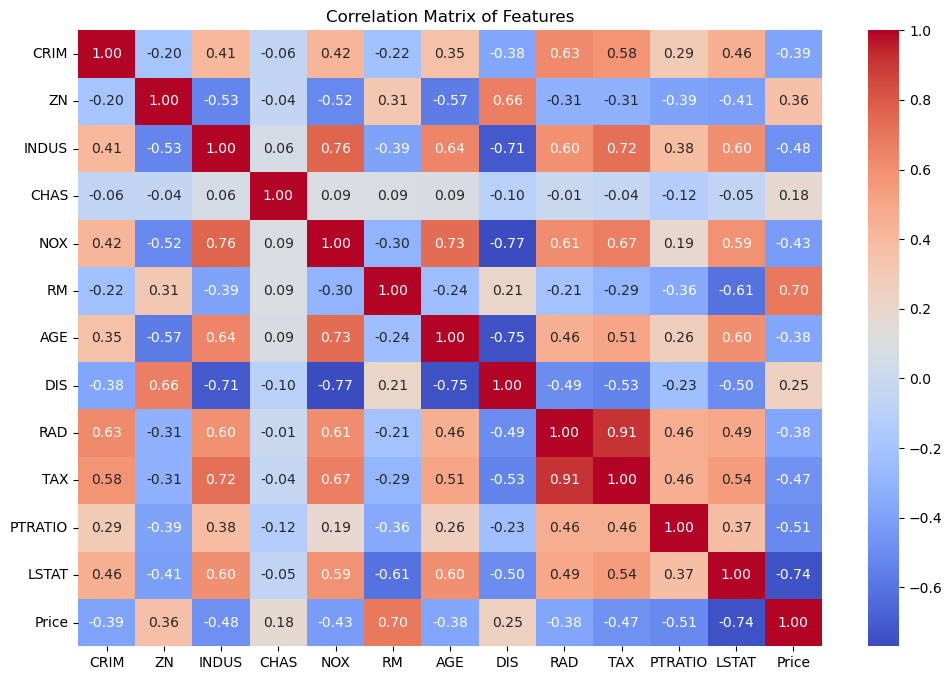

In [330]:
# Visualize correlation matrix of features
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

1. As the number of rooms increases, the home price tends to increase as well.
2. Homes with fewer rooms might cluster at lower prices, and homes with more rooms might cluster at higher prices.

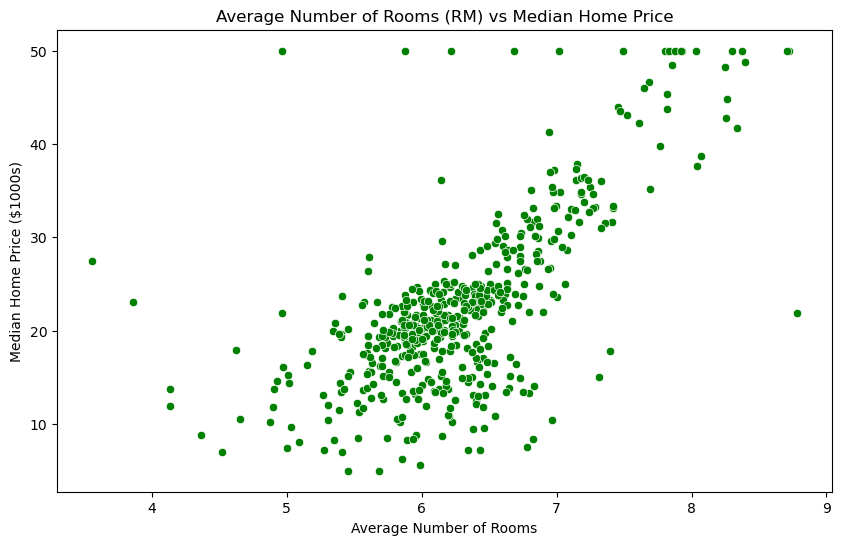

In [332]:
# Scatter plot of RM (rooms) vs 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['RM'], y=df['Price'], color='green')
plt.title('Average Number of Rooms (RM) vs Median Home Price')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Price ($1000s)')
plt.show()

# Splitting the dataset 

In [334]:
X = df.drop('Price', axis=1)
Y = df['Price']

# Feature Scaling (Standardization)

In [336]:
# Standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset in X_train, Y_train, x_test, y_test

In [338]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying Linear Regression Model

In [340]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Testing the accuracy of the model i.e. predictions

In [342]:
predicted = model.predict(X_test)

# Evaluation

In [344]:
# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

In [345]:
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, predicted)

1. The MSE value represents the average squared difference between the actual and predicted values. The lower the MSE, the better the model is at predicting values. In this case, an MSE of 22.78 suggests that the model's predictions are reasonably close to the actual values, but there is still room for improvement.
2. A RMSE of 4.77 means that, on average, the model's predictions deviate from the actual prices by about $4,770. This is a significant error, and the model can be further improved.
3. An R² value of 0.69 means that the model explains about 69% of the variance in the target variable (median home prices). While this is a decent result for a linear regression model, it suggests that 31% of the variance is unexplained by the model. There is still significant room for improvement in terms of predicting the target variable.

In [347]:
print("\nLinear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Linear Regression Results:
Mean Squared Error (MSE): 22.78
Root Mean Squared Error (RMSE): 4.77
R-squared (R²): 0.69


# Visualizations: Model Performance

Points that lie close to the red dashed line indicate that the predicted values are close to the actual values. A perfect prediction would have all points on this line.

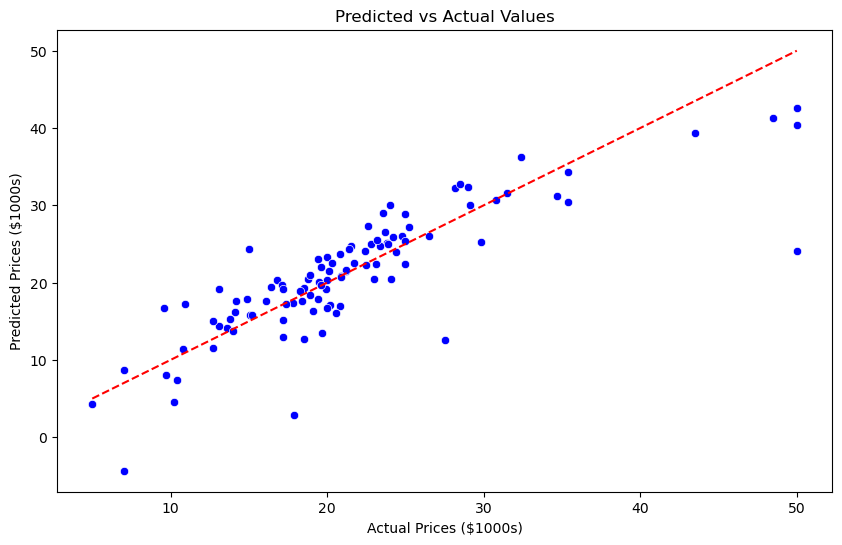

In [350]:
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predicted, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.show()

Error = Actual - Predicted
Here, The red line represents the point where there is no error between the predicted and actual values. The residuals should ideally be scattered around this line.
Note : Outliers or high leverage points could indicate problematic data (e.g., errors in data collection or unusual instances that don't follow the general pattern). You might need to investigate these points further, possibly removing them or treating them differently.

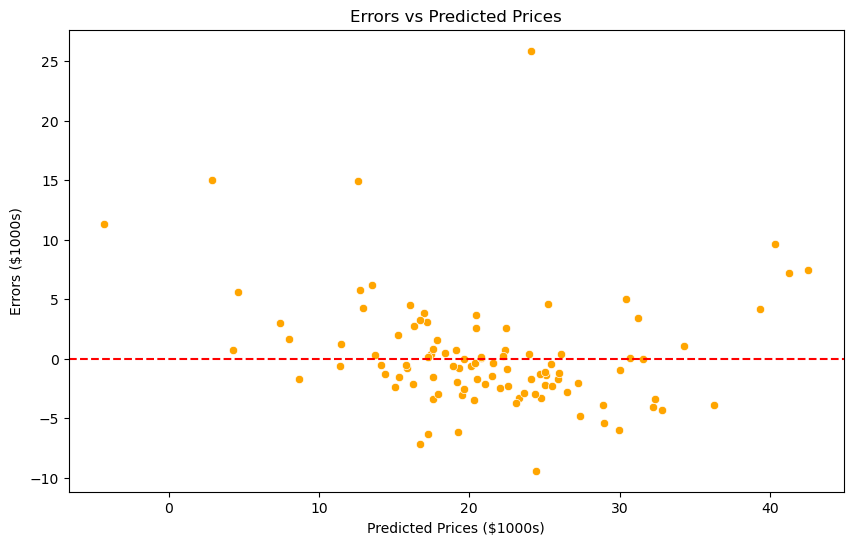

In [352]:
# Residuals vs Predicted values
errors = y_test - predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted, y=errors, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Errors vs Predicted Prices')
plt.xlabel('Predicted Prices ($1000s)')
plt.ylabel('Errors ($1000s)')
plt.show()

1. If the histogram is approximately bell-shaped and symmetrical, with the peak around zero, it suggests that the residuals are normally distributed. This is ideal for linear regression models because one of the assumptions of linear regression is that the residuals (errors) should be normally distributed. This implies that the model's predictions are unbiased and the errors are random.
2. The KDE curve should resemble a normal distribution (a bell curve). If the histogram is roughly symmetric with the center around 0, it indicates that your model is well-calibrated.
3. Large spikes or extreme values (long tails) in the histogram could indicate the presence of outliers in the residuals.
4. The tail towards rights side indicates that there may be some extreme values or outliers that are causing the model to consistently underpredict for those observations.

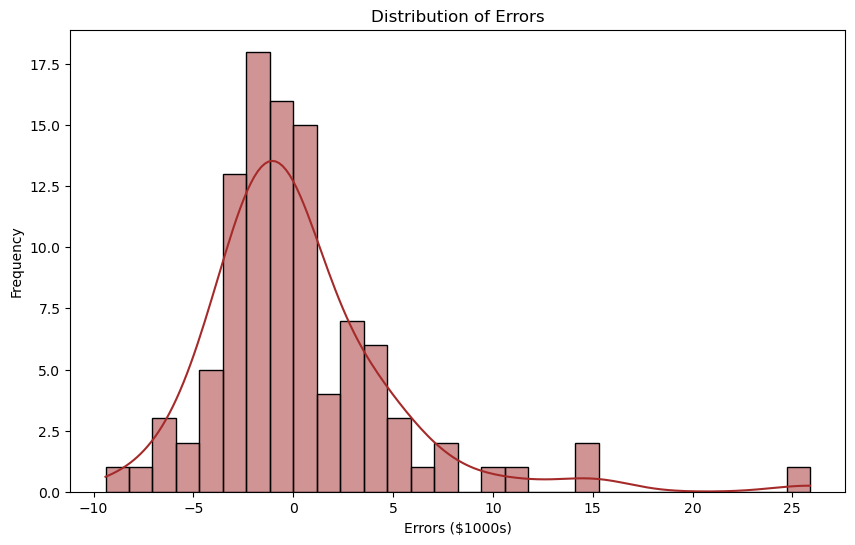

In [354]:
# Plot: Distribution of residuals (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='brown')
plt.title('Distribution of Errors')
plt.xlabel('Errors ($1000s)')
plt.ylabel('Frequency')
plt.show()

# Now using Ridge Regression (Regularization) after Linear Regression as there is chance of improvement

In [384]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train, y_train)

Ridge()

In [386]:
y_pred = ridge_model.predict(X_test)

In [388]:
y_pred_ridge_original = np.exp(y_pred)

In [390]:
# Evaluate Ridge model performance
r2_ridge = r2_score(y_test_original, y_pred_ridge_original)
mae_ridge = mean_absolute_error(y_test_original, y_pred_ridge_original)
mse_ridge = mean_squared_error(y_test_original, y_pred_ridge_original)
rmse_ridge = np.sqrt(mse_ridge)


NameError: name 'y_test_original' is not defined

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Assuming you already have your data
# Standardizing before Train-Test Split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X contains the features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using the trained Linear Regression model
y_pred = lr_model.predict(X_test)

# Convert predictions back to the original scale (exponentiate the log-transformed values)
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# Evaluate the Linear Regression Model performance
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

# Print the performance metrics for Linear Regression
print(f"Linear Regression - R-squared: {r2:.4f}")
print(f"Linear Regression - Mean Absolute Error (MAE): {mae:.4f}")
print(f"Linear Regression - Mean Squared Error (MSE): {mse:.4f}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse:.4f}")

# Residuals vs Predicted Prices plot
errors = y_test_original - y_pred_original
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_original, y=errors, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices ($1000s)')
plt.ylabel('Residuals ($1000s)')
plt.show()

# Distribution of residuals (errors)
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='brown')
plt.title('Distribution of Errors')
plt.xlabel('Errors ($1000s)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original, color='green')
plt.plot([0, max(y_test_original)], [0, max(y_test_original)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.show()

# Now, after this point, we can move to regularization and polynomial regression
# --------------------------
# Ridge Regression (Regularization) after Linear Regression
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train, y_train)

# Predict using the trained Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Convert predictions back to the original scale (exponentiate the log-transformed values)
y_pred_ridge_original = np.exp(y_pred_ridge)

# Evaluate Ridge model performance
r2_ridge = r2_score(y_test_original, y_pred_ridge_original)
mae_ridge = mean_absolute_error(y_test_original, y_pred_ridge_original)
mse_ridge = mean_squared_error(y_test_original, y_pred_ridge_original)
rmse_ridge = np.sqrt(mse_ridge)

# Print performance metrics for Ridge regression
print("\nRidge Regression Performance:")
print(f"R-squared: {r2_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")

# Polynomial Regression (Optional: if you suspect non-linearity)
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict and evaluate for polynomial regression
y_pred_poly = poly_model.predict(X_test_poly)
y_pred_poly_original = np.exp(y_pred_poly)

# Print performance metrics for polynomial regression
r2_poly = r2_score(y_test_original, y_pred_poly_original)
mae_poly = mean_absolute_error(y_test_original, y_pred_poly_original)
mse_poly = mean_squared_error(y_test_original, y_pred_poly_original)
rmse_poly = np.sqrt(mse_poly)

print("\nPolynomial Regression Performance:")
print(f"R-squared: {r2_poly:.4f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.4f}")